# Import the necessary libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from IPython.display import display
from datetime import datetime
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Reading the DataSet

#### Option 1 - load dataset from google drive

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
 file_name = '/content/drive/My Drive/Team 10- AI Data Analyst/Week 3 Deliverables/Cleaned_Preprocessed_Dataset.csv' # Get the uploaded file name
#Load the dataset, specifying the encoding
 df = pd.read_csv(file_name, encoding='latin1')

#### Option 2 - load dataset from your local machine

In [14]:
#from google.colab import files
#uploaded = files.upload()

In [10]:
# file_name = list(uploaded.keys())[0]  # Get the uploaded file name
# Load the dataset, specifying the encoding
 # df = pd.read_csv(file_name, encoding='latin1')

In [15]:
# Seeing the head
df.head()

,learner_signup_datetime,opportunity_id,opportunity_end_date,first_name,date_of_birth,institution_name,current/intended_major,entry_created_at,status_code,apply_date,...,opportunity_name_Jump Start: Developing your Emotional Intelligence,opportunity_name_Mental and Physical Health Session,opportunity_name_Project Management,opportunity_name_Project Management Associate,opportunity_name_Slide Geeks: A Presentation Design Competition,opportunity_name_Startup Mastery Workshop,opportunity_name_UX Redesign Challenge,opportunity_name_Upload Your First Year Transcript,opportunity_name_UrbanRenew Challenge,opportunity_name_Xperience Design Hackathon
0,2023-06-14,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Faria,2001-01-12,Nwihs,Radiology,2024-03-11,0.636364,2023-06-14,...,False,False,False,False,False,False,False,False,False,False
1,2023-05-01,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Poojitha,2000-08-16,Saint Louis University,Information Systems,2024-03-11,0.636364,2023-05-01,...,False,False,False,False,False,False,False,False,False,False
2,2023-04-09,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Emmanuel,2002-01-27,Illinois Institute of Technology,Computer Science,2024-03-11,0.636364,2023-05-11,...,False,False,False,False,False,False,False,False,False,False
3,2023-08-29,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Amrutha Varshini,1999-11-01,Saint Louis University,Information Systems,2024-03-11,0.545455,2023-10-09,...,False,False,False,False,False,False,False,False,False,False
4,2023-01-06,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Vinay Varshith,2000-04-19,Saint Louis University,Computer Science,2024-03-11,0.636364,2023-01-06,...,False,False,False,False,False,False,False,False,False,False


## Selecting the columns

In [16]:
columns = [
    'status_code', 'age', 'opportunity_duration',
     'opportunity_end_date_month',
    'opportunity_start_date_month', 'engagement_time', 'duration_age_interaction',
    'engagement_score', 'opportunity_category_Competition', 'opportunity_category_Course',
    'opportunity_category_Engagement', 'opportunity_category_Event',
    'opportunity_category_Internship',
     "gender_Don't want to specify", 'gender_Female',
    'gender_Male', 'gender_Other','opportunity_name_AI Ethics Challenge', 'opportunity_name_Business Consulting',
    'opportunity_name_CPR/AED Certification', 'opportunity_name_Career Essentials: Getting Started with Your Professional Journey',
    'opportunity_name_Data Visualization', 'opportunity_name_Data Visualization Associate',
    'opportunity_name_Digital Marketing', 'opportunity_name_Digital Strategy Virtual Internship',
    'opportunity_name_Freelance Mastery workshop', 'opportunity_name_Health Care Management',
    'opportunity_name_Innovation & Entrepreneurship', 'opportunity_name_Join a Student Organisation',
    'opportunity_name_Jump Start: Developing your Emotional Intelligence',
    'opportunity_name_Mental and Physical Health Session', 'opportunity_name_Project Management',
    'opportunity_name_Project Management Associate', 'opportunity_name_Slide Geeks: A Presentation Design Competition',
    'opportunity_name_Startup Mastery Workshop', 'opportunity_name_UX Redesign Challenge',
    'opportunity_name_Upload Your First Year Transcript', 'opportunity_name_UrbanRenew Challenge',
    'opportunity_name_Xperience Design Hackathon', 'drop_off'
]

df_copy = df[columns]

In [17]:
df_copy['drop_off'].value_counts()

,count
drop_off,
0.0,7835
1.0,701


In [18]:
df_copy.head()

,status_code,age,opportunity_duration,opportunity_end_date_month,opportunity_start_date_month,engagement_time,duration_age_interaction,engagement_score,opportunity_category_Competition,opportunity_category_Course,...,opportunity_name_Mental and Physical Health Session,opportunity_name_Project Management,opportunity_name_Project Management Associate,opportunity_name_Slide Geeks: A Presentation Design Competition,opportunity_name_Startup Mastery Workshop,opportunity_name_UX Redesign Challenge,opportunity_name_Upload Your First Year Transcript,opportunity_name_UrbanRenew Challenge,opportunity_name_Xperience Design Hackathon,drop_off
0,0.636364,0.227273,0.747961,6,11,0.677536,0.376111,0.801853,False,True,...,False,False,False,False,False,False,False,False,False,0.0
1,0.636364,0.227273,0.747961,6,11,0.624396,0.376111,0.782128,False,True,...,False,False,False,False,False,False,False,False,False,0.0
2,0.636364,0.204545,0.747961,6,11,0.636473,0.366075,0.786163,False,True,...,False,False,False,False,False,False,False,False,False,0.0
3,0.545455,0.250000,0.747961,6,11,0.818841,0.386148,0.854752,False,True,...,False,False,False,False,False,False,False,False,False,0.0
4,0.636364,0.227273,0.747961,6,11,0.485507,0.376111,0.730574,False,True,...,False,False,False,False,False,False,False,False,False,0.0


In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 40 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   status_code                                                                         8536 non-null   float64
 1   age                                                                                 8536 non-null   float64
 2   opportunity_duration                                                                8536 non-null   float64
 3   opportunity_end_date_month                                                          8536 non-null   int64  
 4   opportunity_start_date_month                                                        8536 non-null   int64  
 5   engagement_time                                                                     8536 non-null

## Splitting the data

In [20]:
#Seed value
s = 101

In [21]:
#Selecting the target and feature variables
X = df_copy.drop('drop_off', axis=1) #Feature
y = df_copy["drop_off"] #Target

In [22]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = s )

In [23]:
#Seeing the shape of X_train, and X_test
print('The shape of X_train: ', X_train.shape)
print('The shape of X_test: ', X_test.shape)

The shape of X_train:  (6828, 39)
The shape of X_test:  (1708, 39)


In [24]:
#Seeing the shape of y_train, and y_test
print('The shape of y_train: ', y_train.shape)
print('The shape of y_test: ', y_test.shape)

The shape of y_train:  (6828,)
The shape of y_test:  (1708,)


# Modeling:


## RandomForestClassifier Model

In [25]:
# initialize the model
rfc_1 = RandomForestClassifier(criterion = 'gini', max_depth= None,
                               n_estimators=100, class_weight='balanced', random_state= s)

# train the data using the training sets
rfc_1.fit(X_train, y_train)

# predict using the test data
rfc_1_pred = rfc_1.predict(X_test)

# evaluation the model using the y_testing dataset and the classifier predictions
print("Classification Report:")

print(classification_report(y_test, rfc_1_pred, zero_division=0), '\n')

# assign labels for the confusion matrix
labels = ['1: Drop Off', '0: No drop-off']

print("Confusion Matrix:")
pd.DataFrame(data=confusion_matrix(y_test, rfc_1_pred), index=labels, columns=labels)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1568
         1.0       1.00      0.99      1.00       140

    accuracy                           1.00      1708
   macro avg       1.00      1.00      1.00      1708
weighted avg       1.00      1.00      1.00      1708
 

Confusion Matrix:


,1: Drop Off,0: No drop-off
1: Drop Off,1568,0
0: No drop-off,1,139


#### Features Importance in The RandomForest Model

In [26]:
# lets get the features and their importance
feature_importances = rfc_1.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Convert importance to percentage
importance_df["Importance (%)"] = (importance_df["Importance"] / importance_df["Importance"].sum()) * 100

# Sort by importance (descending)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance,Importance (%)
0,status_code,3.378675e-01,33.786750
5,engagement_time,1.707448e-01,17.074485
7,engagement_score,1.628166e-01,16.281656
6,duration_age_interaction,5.686065e-02,5.686065
12,opportunity_category_Internship,5.317785e-02,5.317785
3,opportunity_end_date_month,3.954392e-02,3.954392
2,opportunity_duration,3.861682e-02,3.861682
4,opportunity_start_date_month,2.976755e-02,2.976755
1,age,2.077050e-02,2.077050
22,opportunity_name_Data Visualization Associate,1.300980e-02,1.300980


## Overall mean of features

In [27]:
np.mean(feature_importances)

0.02564102564102564

#Churn Analysis:


##Feature Importance Visualization

<ipython-input-22-128802247308>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette=color_palette)


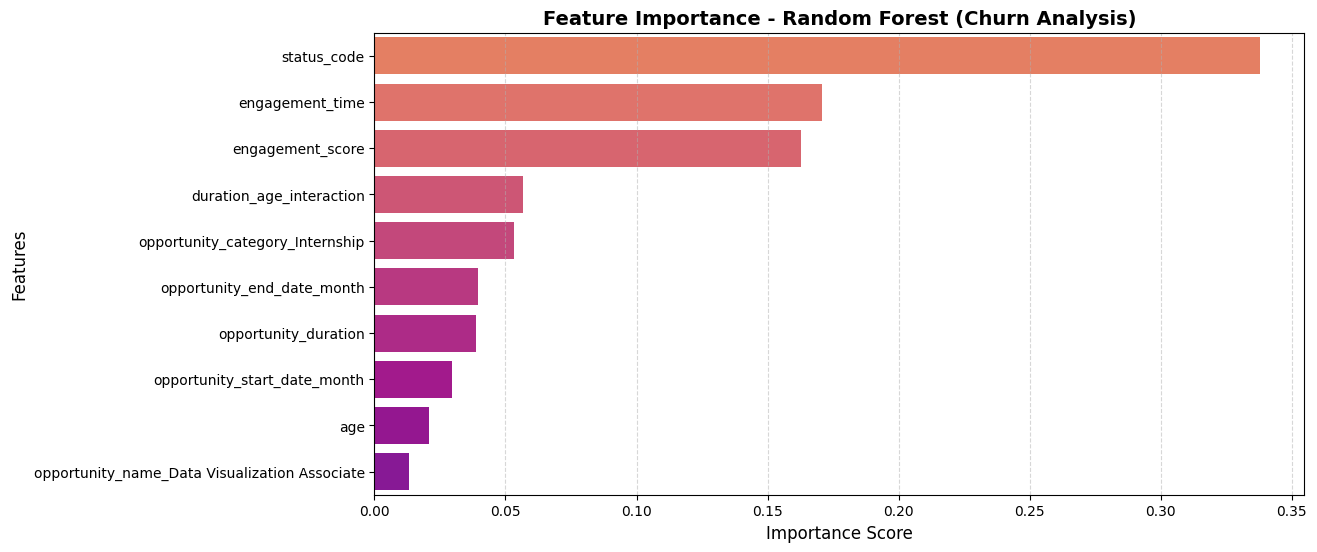

,Feature,Importance
0,status_code,0.337868
5,engagement_time,0.170745
7,engagement_score,0.162817
6,duration_age_interaction,0.056861
12,opportunity_category_Internship,0.053178
3,opportunity_end_date_month,0.039544
2,opportunity_duration,0.038617
4,opportunity_start_date_month,0.029768
1,age,0.020770
22,opportunity_name_Data Visualization Associate,0.013010


In [ ]:
import seaborn as sns

# Extract feature importance from the trained Random Forest model
feature_importances = rfc_1.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Limit to top 10 features for clarity
top_features = feature_importance_df.head(10)

# Excelerate color palette (using only the required number of colors)
color_palette = [
    "#fa734d", "#f26258", "#ea525f", "#e1426b", "#d73378",
    "#cd2484", "#c31590", "#b8049b", "#a902a3", "#9704aa"
]

# Ensure color list matches the number of top features
color_palette = color_palette[:len(top_features)]

# Plot feature importance using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette=color_palette)

# Improve plot readability
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - Random Forest (Churn Analysis)", fontsize=14, fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

# Display the top 10 influential factors
display(top_features)


##Churn Distribution Visualization

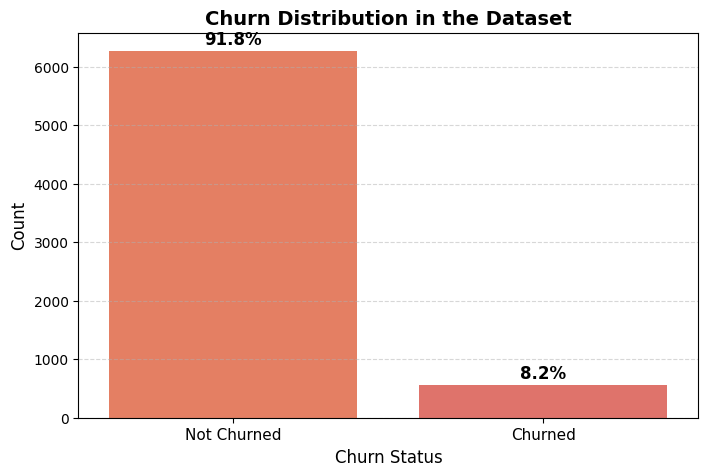

In [ ]:
# Churn Distribution Visualization
plt.figure(figsize=(8, 5))

# Using the first two colors for binary Churn categories
sns.countplot(x=y_train, hue=y_train, palette=color_palette[:2], legend=False)

# Annotate percentage on bars
total = len(y_train)
ax = plt.gca()
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", fontsize=12, fontweight="bold", xytext=(0, 5),
                textcoords="offset points")

plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Churn Distribution in the Dataset", fontsize=14, fontweight='bold')
plt.xticks(ticks=[0, 1], labels=["Not Churned", "Churned"], fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


##Top Features Distribution Analysis

Top Features Influencing Churn: ['status_code', 'engagement_time', 'engagement_score', 'duration_age_interaction', 'opportunity_category_Internship']


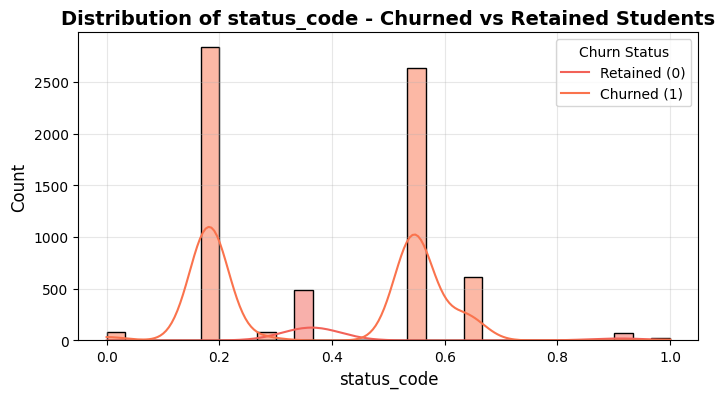

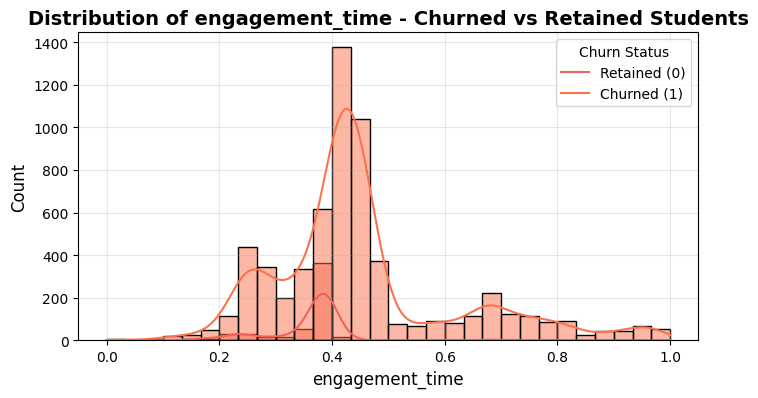

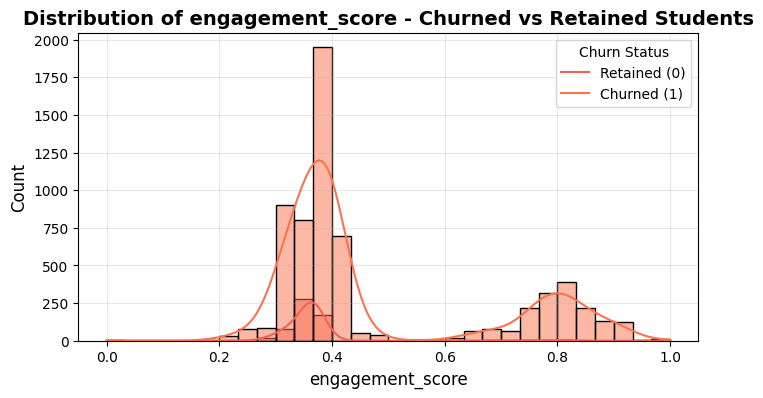

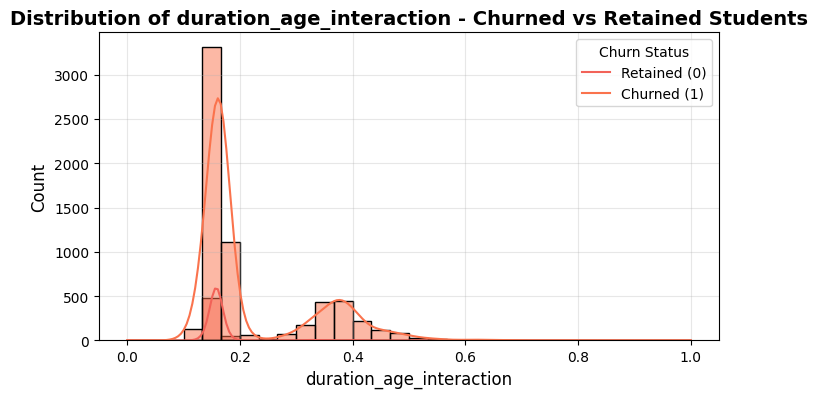

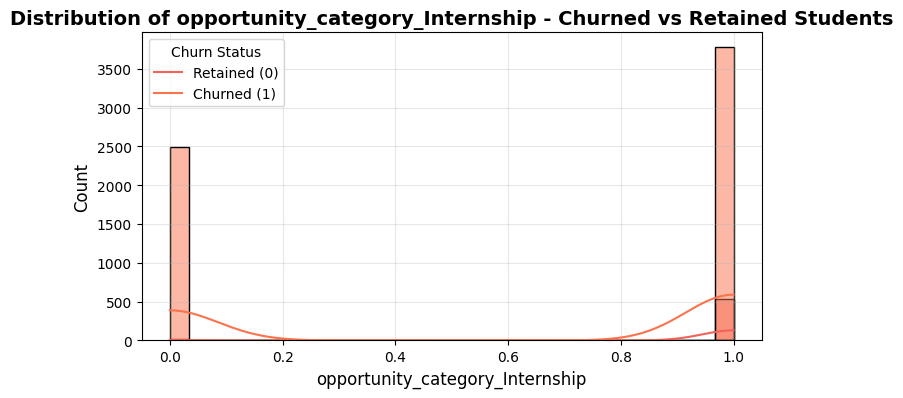

In [ ]:
# Get the top 5 most important features
top_features = feature_importance_df.head(5)['Feature'].tolist()
print("Top Features Influencing Churn:", top_features)

# Combine with target variable (assuming y_train contains churn labels: 1 = Churned, 0 = Retained)
churn_data = pd.concat([X_train[top_features], y_train.rename("Churn")], axis=1)

# Plot distribution of top features for churned vs retained students
for i, feature in enumerate(top_features):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=churn_data, x=feature, hue="Churn", bins=30, kde=True, palette=color_palette[:2])
    plt.title(f"Distribution of {feature} - Churned vs Retained Students", fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Churn Status", labels=["Retained (0)", "Churned (1)"])
    plt.grid(alpha=0.3)
    plt.show()

##Mean Differences Analysis




 Mean Values of Key Features for Churned vs Retained Students:



,Retained (0),Churned (1)
status_code,0.380246,0.435586
engagement_time,0.452265,0.360965
engagement_score,0.479498,0.363551
duration_age_interaction,0.219566,0.162551
opportunity_category_Internship,0.603159,0.960784


<Figure size 1000x600 with 0 Axes>

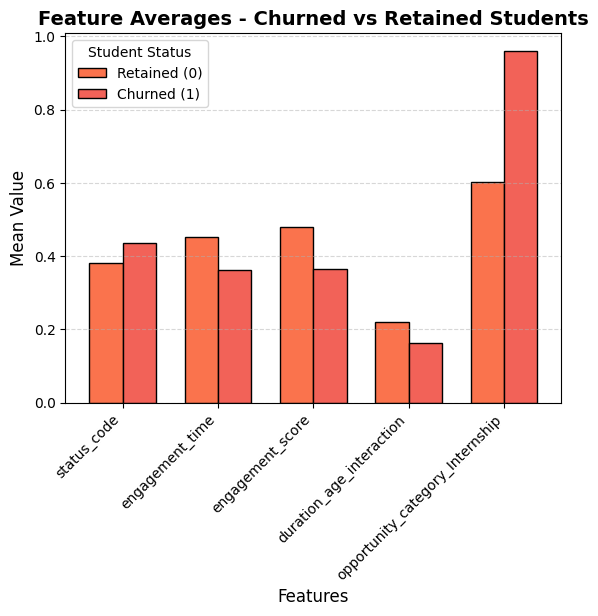

In [ ]:
# Calculate mean values for churned vs retained students
churn_summary = churn_data.groupby("Churn").mean().T  # Transpose for better readability
churn_summary.columns = ["Retained (0)", "Churned (1)"]

# Display the churn summary
print("\n Mean Values of Key Features for Churned vs Retained Students:\n")
display(churn_summary)

# Visualize the summary using a bar plot
plt.figure(figsize=(10, 6))
churn_summary.plot(kind="bar", color=color_palette[:2], width=0.7, edgecolor="black")

plt.title("Feature Averages - Churned vs Retained Students", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.legend(title="Student Status", labels=["Retained (0)", "Churned (1)"])
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

##Feature Correlation with Churn

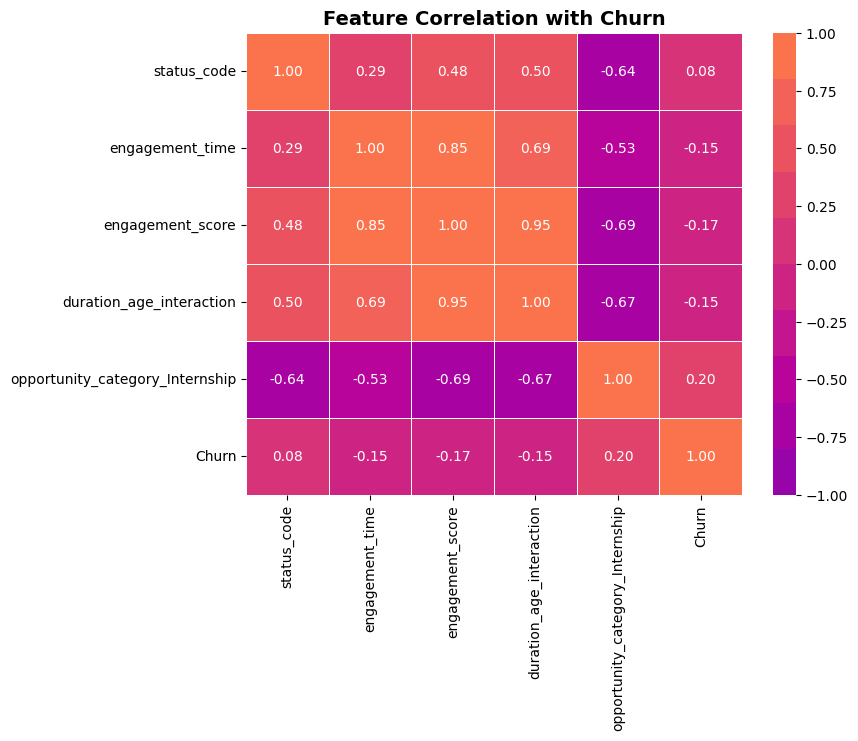

In [ ]:
# Compute correlation of top features with churn
correlation_matrix = churn_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=color_palette[::-1], fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Feature Correlation with Churn", fontsize=14, fontweight='bold')
plt.show()
